<a href="https://colab.research.google.com/github/amandascholze/Data_Sci/blob/main/Scholze_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [126]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [127]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [128]:
#gpu = fast chip

In [129]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [130]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [131]:
url = "https://docs.google.com/presentation/d/1l8M6Tl6Z6d1WkSNkBu9iK5Df70aUZgATX_XEKxDOl-A/edit#slide=id.g1a11663ae21_0_145"

In [132]:

#takes us to our slides

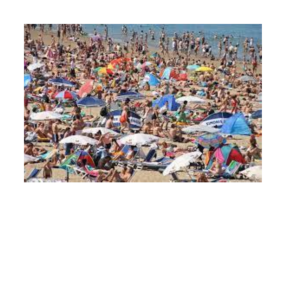

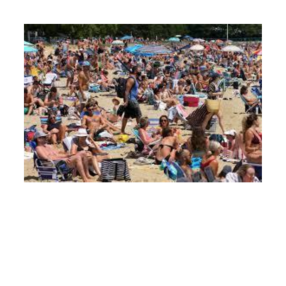

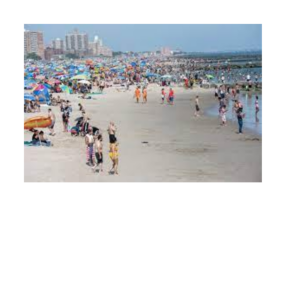

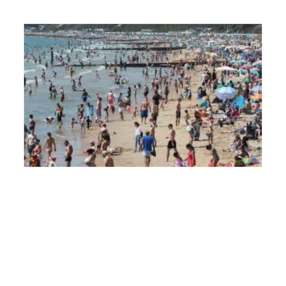

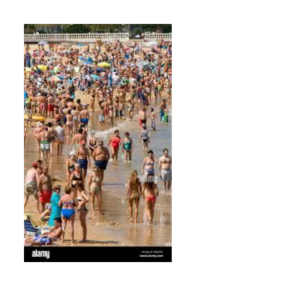

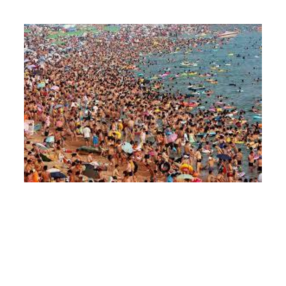

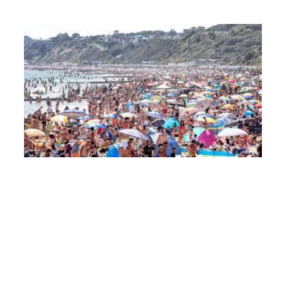

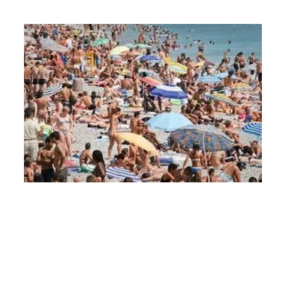

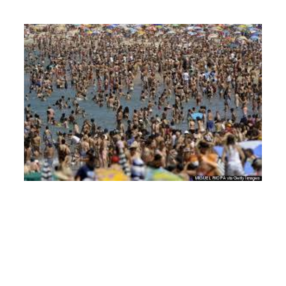

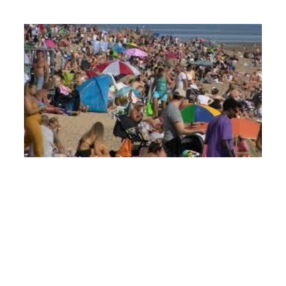

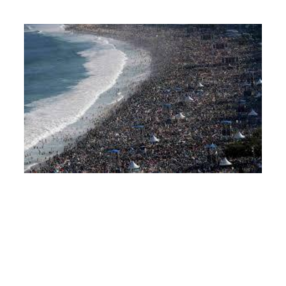

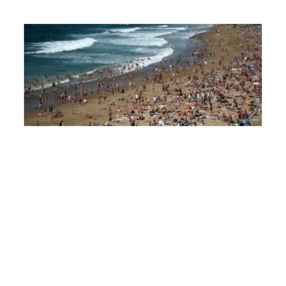

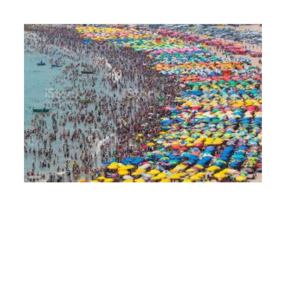

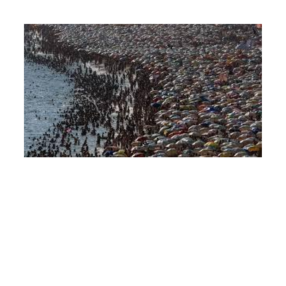

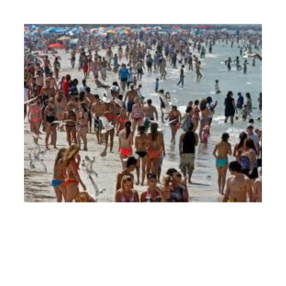

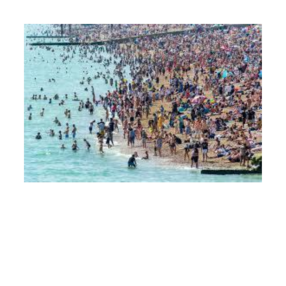

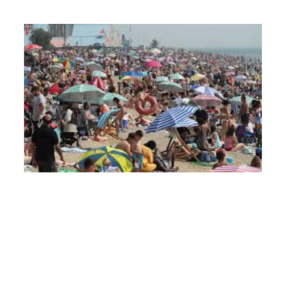

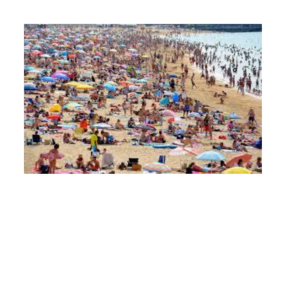

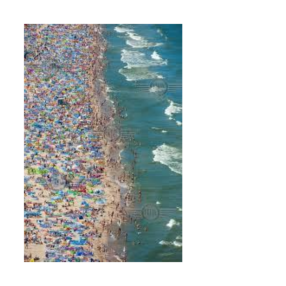

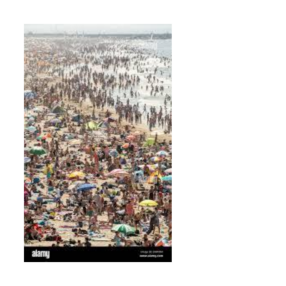

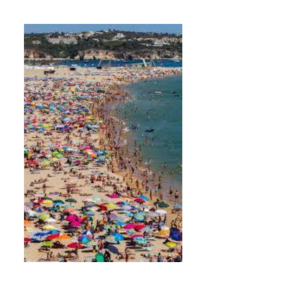

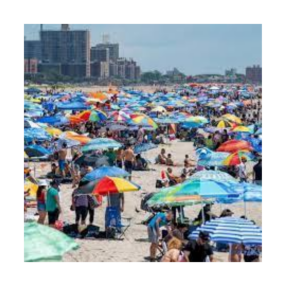

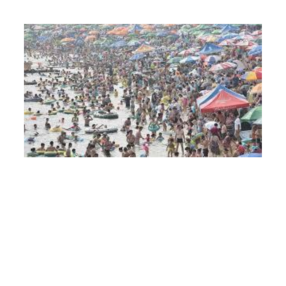

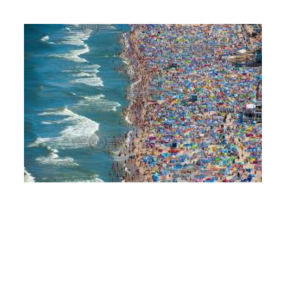

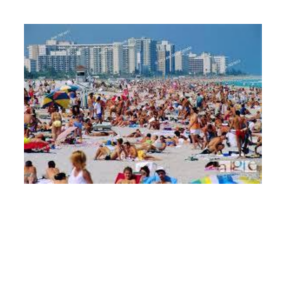

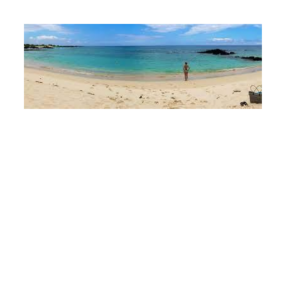

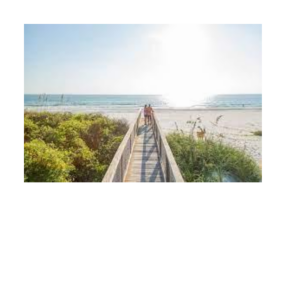

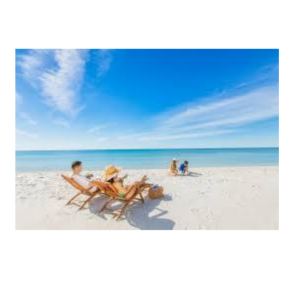

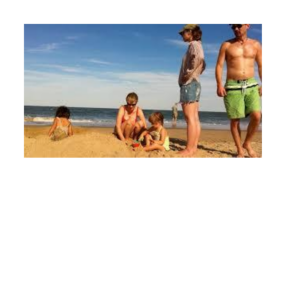

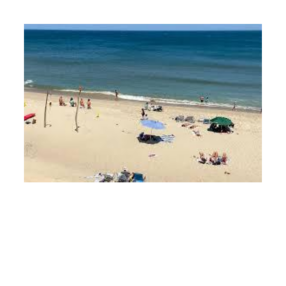

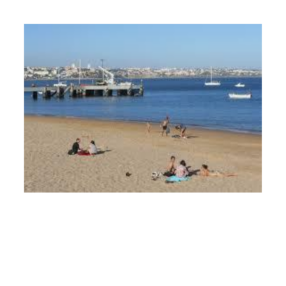

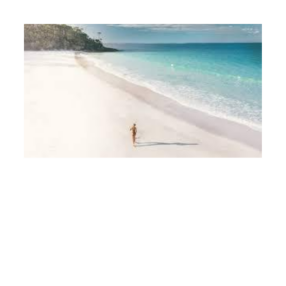

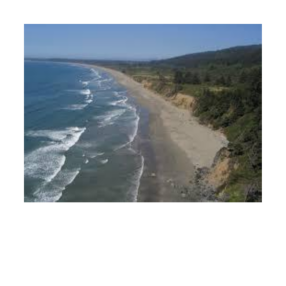

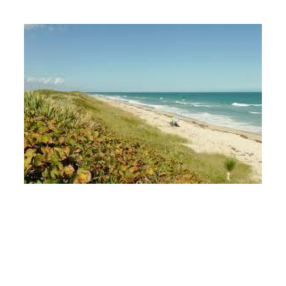

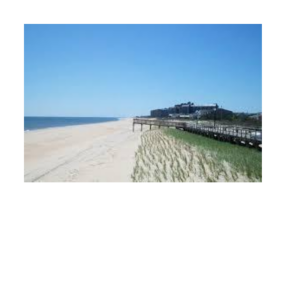

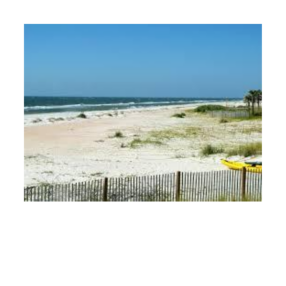

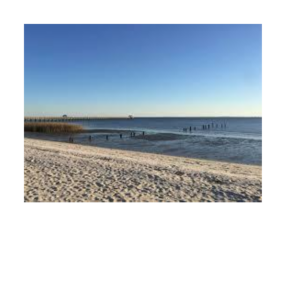

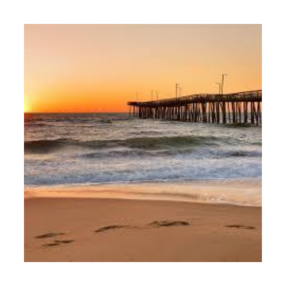

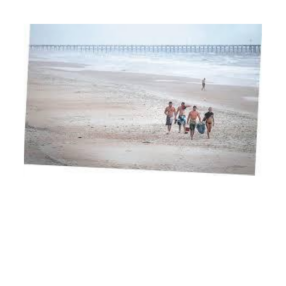

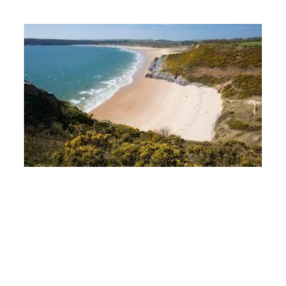

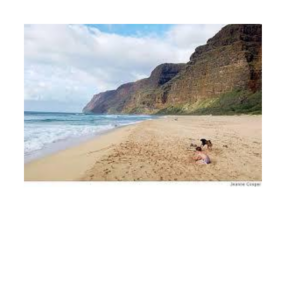

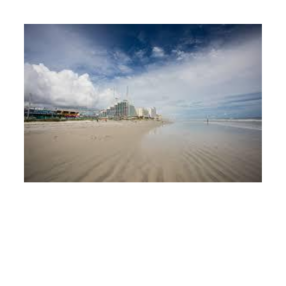

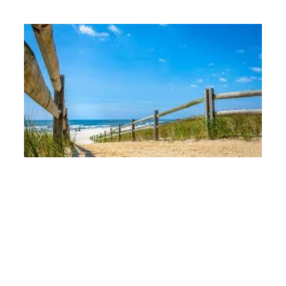

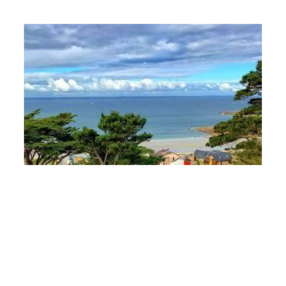

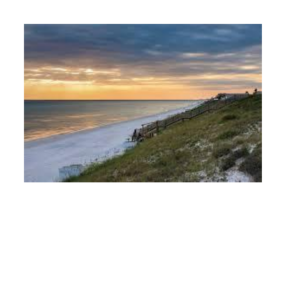

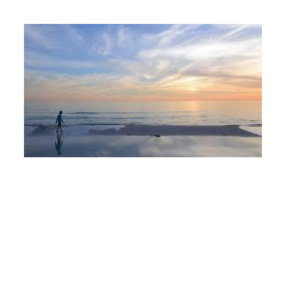

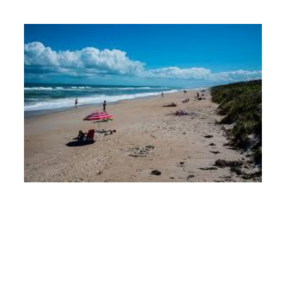

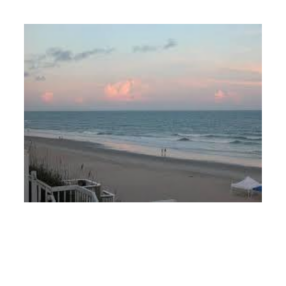

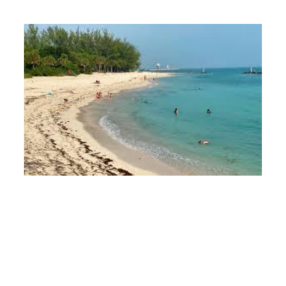

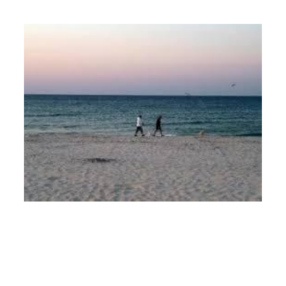

In [133]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [134]:
images.shape

torch.Size([50, 3, 224, 224])

In [135]:
#shows we brought in 50 imaged with 3 color changes and 224x224 pixels

In [136]:
model(images)

tensor([[-2.5145, -1.0059, -3.5715,  ..., -2.9876, -0.1886,  2.4546],
        [-2.5612, -1.5531, -3.1170,  ..., -2.4482,  1.2743,  1.9716],
        [-4.9990, -2.3475, -2.0713,  ..., -5.7808, -1.8823,  1.2263],
        ...,
        [ 1.4557, -2.6548, -0.5142,  ..., -5.3462, -1.1758,  0.5151],
        [ 1.3598, -2.1095,  2.5532,  ..., -0.8227,  1.3016, -0.6513],
        [-0.1256, -5.7367,  0.5637,  ..., -6.9296, -2.3277,  0.4022]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [137]:
y = model(images)

In [138]:
y.shape

torch.Size([50, 1000])

In [139]:
#turned images into a list of 1000 #

In [140]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [141]:
for i in list(guesses):
    print(labels[i])

jigsaw puzzle
web site, website, internet site, site
dogsled, dog sled, dog sleigh
web site, website, internet site, site
abacus
envelope
seashore, coast, seacoast, sea-coast
jigsaw puzzle
honeycomb
web site, website, internet site, site
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
seashore, coast, seacoast, sea-coast
envelope
thatch, thatched roof
web site, website, internet site, site
abacus
monitor
jigsaw puzzle
prayer rug, prayer mat
prayer rug, prayer mat
jigsaw puzzle
seashore, coast, seacoast, sea-coast
monitor
envelope
web site, website, internet site, site
sandbar, sand bar
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
s

In [142]:
Y = np.zeros(50,) #answer key
Y[25:] = 1

In [143]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [144]:
X = y.detach().cpu().numpy() 

In [145]:
X.shape

(50, 1000)

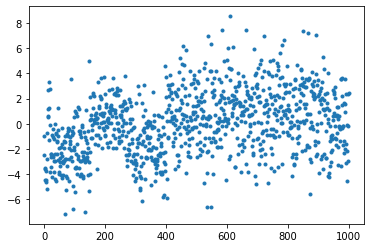

In [146]:
plt.plot(X[0],'.')

In [147]:
X[0]

array([-2.5145094 , -1.0059263 , -3.5715177 , -4.500982  , -3.4809785 ,
       -4.463856  , -4.5927095 , -3.7360883 , -2.8080354 , -5.1979566 ,
       -0.71773005,  1.1491109 ,  0.5123644 ,  0.5871353 ,  2.687292  ,
        1.2113545 , -1.2970482 ,  3.3516695 , -0.06232103,  2.7962058 ,
       -3.821844  , -2.4208999 , -2.6003351 , -2.3684974 , -3.4669914 ,
       -0.8969157 , -4.2395196 , -2.4659078 , -2.6323857 , -1.0746176 ,
       -0.37764004, -2.9394279 , -1.1910855 , -3.8025906 , -2.4194903 ,
       -4.384592  , -0.04559845, -2.9832034 , -0.71139795, -0.8065478 ,
       -4.5753236 , -1.3822426 , -1.466876  , -2.4347823 , -0.99154913,
        1.2547128 , -2.8744006 , -0.45878613, -3.8685396 , -3.9545398 ,
       -1.9412755 , -3.3543675 , -3.0384064 , -2.725522  , -2.3467565 ,
       -4.0332737 , -1.8497388 , -4.330963  , -2.572151  , -0.3565667 ,
       -1.5953926 , -2.9784474 , -3.1025615 , -4.070011  , -2.927868  ,
       -1.9091899 , -1.399602  , -1.4548932 , -0.9767525 , -2.77

In [148]:
np.argmax(X[25])

977

In [149]:
#shows highest number

In [150]:
labels[977]

'sandbar, sand bar'

In [151]:
top_ten = np.argsort(X[25])[::-1][0:10]

In [152]:
top_ten

array([977, 978, 916, 830, 758, 736, 975, 700, 919, 706])

In [153]:
#gives us top ten

In [154]:
for i in top_ten:
  print(labels[i])

sandbar, sand bar
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
stretcher
reel
pool table, billiard table, snooker table
lakeside, lakeshore
paper towel
street sign
patio, terrace


In [155]:
#prints the top ten labels

(array([  9.,  42., 135., 188., 239., 193., 133.,  44.,  10.,   7.]),
 array([-7.155895  , -5.5872407 , -4.018586  , -2.4499319 , -0.88127744,
         0.687377  ,  2.2560315 ,  3.8246858 ,  5.39334   ,  6.9619946 ,
         8.530649  ], dtype=float32),
 <a list of 10 Patch objects>)

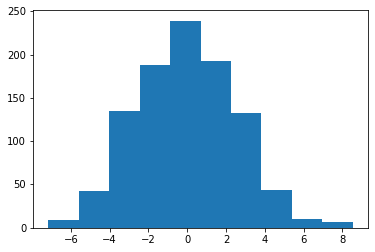

In [156]:
plt.hist(X[0])

In [157]:
X = GPU_data(X)
Y = GPU_data(Y)

In [158]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [159]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [160]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [161]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [162]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [163]:
X.shape

torch.Size([50, 1000])

In [164]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [165]:
def model(x,w):

    return x@w[0]

In [166]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [174]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-127-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
